In [115]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

In [116]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from fastai import *
from fastai.tabular import *

In [3]:
data_df = pd.read_csv('COVID-CT-MetaInfo-COMBINED.csv')
# data_df = data_df.fillna("N/A")
data_df

,File name,Patient ID,COVID Positive?,Location,Age,Gender,Medical history,Time,Severity,Other diseases,DOI,Captions
0,2020.03.18.20038125-p16-56-6.png,Patient 144,1,"""Diamond Princess"" Cruise Ship",75.0,M,an increase of extent of GGO with crazy-paving...,On the tenth day of admission,severe,NaN,NaN,['Figure 2. The progress of CT findings in a p...
1,2020.03.18.20038125-p16-56-5.png,Patient 144,1,"""Diamond Princess"" Cruise Ship",75.0,M,an increase of extent of GGO with crazy-paving...,On the tenth day of admission,severe,NaN,NaN,['Figure 2. The progress of CT findings in a p...
2,2020.03.18.20038125-p16-56-4.png,Patient 144,1,"""Diamond Princess"" Cruise Ship",75.0,M,an increase of extent of GGO with crazy-paving...,On the tenth day of admission,severe,NaN,NaN,['Figure 2. The progress of CT findings in a p...
3,2020.03.18.20038125-p16-56-3.png,Patient 144,1,"""Diamond Princess"" Cruise Ship",75.0,M,"On the fourth day of admission, he showed tach...",On the day of admission,severe,NaN,NaN,['Figure 2. The progress of CT findings in a p...
4,2020.03.18.20038125-p16-56-2.png,Patient 144,1,"""Diamond Princess"" Cruise Ship",75.0,M,"On the fourth day of admission, he showed tach...",On the day of admission,severe,NaN,NaN,['Figure 2. The progress of CT findings in a p...
...,...,...,...,...,...,...,...,...,...,...,...,...
741,10%0.jpg,crawled_patient_10,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
742,1%2.jpg,crawled_patient_1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
743,1%1.jpg,crawled_patient_1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
744,1%0.jpg,crawled_patient_1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
covid_df = data_df[['File name','COVID Positive?','Severity','Location','Age','Gender']]
covid_df

,File name,COVID Positive?,Severity,Location,Age,Gender
0,2020.03.18.20038125-p16-56-6.png,1,severe,"""Diamond Princess"" Cruise Ship",75.0,M
1,2020.03.18.20038125-p16-56-5.png,1,severe,"""Diamond Princess"" Cruise Ship",75.0,M
2,2020.03.18.20038125-p16-56-4.png,1,severe,"""Diamond Princess"" Cruise Ship",75.0,M
3,2020.03.18.20038125-p16-56-3.png,1,severe,"""Diamond Princess"" Cruise Ship",75.0,M
4,2020.03.18.20038125-p16-56-2.png,1,severe,"""Diamond Princess"" Cruise Ship",75.0,M
...,...,...,...,...,...,...
741,10%0.jpg,0,NaN,NaN,NaN,NaN
742,1%2.jpg,0,NaN,NaN,NaN,NaN
743,1%1.jpg,0,NaN,NaN,NaN,NaN
744,1%0.jpg,0,NaN,NaN,NaN,NaN


In [5]:
covid_df['Age'] = covid_df['Age'].astype(str) + ' y/o'
covid_df

C:\Users\Shuja\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,File name,COVID Positive?,Severity,Location,Age,Gender
0,2020.03.18.20038125-p16-56-6.png,1,severe,"""Diamond Princess"" Cruise Ship",75.0 y/o,M
1,2020.03.18.20038125-p16-56-5.png,1,severe,"""Diamond Princess"" Cruise Ship",75.0 y/o,M
2,2020.03.18.20038125-p16-56-4.png,1,severe,"""Diamond Princess"" Cruise Ship",75.0 y/o,M
3,2020.03.18.20038125-p16-56-3.png,1,severe,"""Diamond Princess"" Cruise Ship",75.0 y/o,M
4,2020.03.18.20038125-p16-56-2.png,1,severe,"""Diamond Princess"" Cruise Ship",75.0 y/o,M
...,...,...,...,...,...,...
741,10%0.jpg,0,NaN,NaN,nan y/o,NaN
742,1%2.jpg,0,NaN,NaN,nan y/o,NaN
743,1%1.jpg,0,NaN,NaN,nan y/o,NaN
744,1%0.jpg,0,NaN,NaN,nan y/o,NaN


In [6]:
covid_df['Age'] = covid_df['Age'].str.replace('nan y/o' , 'NaN')
covid_df

C:\Users\Shuja\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,File name,COVID Positive?,Severity,Location,Age,Gender
0,2020.03.18.20038125-p16-56-6.png,1,severe,"""Diamond Princess"" Cruise Ship",75.0 y/o,M
1,2020.03.18.20038125-p16-56-5.png,1,severe,"""Diamond Princess"" Cruise Ship",75.0 y/o,M
2,2020.03.18.20038125-p16-56-4.png,1,severe,"""Diamond Princess"" Cruise Ship",75.0 y/o,M
3,2020.03.18.20038125-p16-56-3.png,1,severe,"""Diamond Princess"" Cruise Ship",75.0 y/o,M
4,2020.03.18.20038125-p16-56-2.png,1,severe,"""Diamond Princess"" Cruise Ship",75.0 y/o,M
...,...,...,...,...,...,...
741,10%0.jpg,0,NaN,NaN,NaN,NaN
742,1%2.jpg,0,NaN,NaN,NaN,NaN
743,1%1.jpg,0,NaN,NaN,NaN,NaN
744,1%0.jpg,0,NaN,NaN,NaN,NaN


In [22]:
# covid_df = covid_df.fillna("N/A") 
# covid_df

In [7]:
covid_df['COVID Positive?'].replace(1, '2019-nCoV-Positive',inplace=True)
covid_df['COVID Positive?'].replace(0, '2019-nCoV-Negative',inplace=True)

C:\Users\Shuja\Anaconda3\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [8]:
covid_df['Gender'].replace('M', 'Male',inplace=True)
covid_df['Gender'].replace('F', 'Female',inplace=True)

In [9]:
covid_df

,File name,COVID Positive?,Severity,Location,Age,Gender
0,2020.03.18.20038125-p16-56-6.png,2019-nCoV-Positive,severe,"""Diamond Princess"" Cruise Ship",75.0 y/o,Male
1,2020.03.18.20038125-p16-56-5.png,2019-nCoV-Positive,severe,"""Diamond Princess"" Cruise Ship",75.0 y/o,Male
2,2020.03.18.20038125-p16-56-4.png,2019-nCoV-Positive,severe,"""Diamond Princess"" Cruise Ship",75.0 y/o,Male
3,2020.03.18.20038125-p16-56-3.png,2019-nCoV-Positive,severe,"""Diamond Princess"" Cruise Ship",75.0 y/o,Male
4,2020.03.18.20038125-p16-56-2.png,2019-nCoV-Positive,severe,"""Diamond Princess"" Cruise Ship",75.0 y/o,Male
...,...,...,...,...,...,...
741,10%0.jpg,2019-nCoV-Negative,NaN,NaN,NaN,NaN
742,1%2.jpg,2019-nCoV-Negative,NaN,NaN,NaN,NaN
743,1%1.jpg,2019-nCoV-Negative,NaN,NaN,NaN,NaN
744,1%0.jpg,2019-nCoV-Negative,NaN,NaN,NaN,NaN


In [10]:
covid_df["Severity"].unique()

array(['severe', 'asymptomatic ', 'mild', 'critical', 'light', 'Absorption stage', 'Consolidation stage',
       'Early stage', 'Early stage ', 'Dissipation stage', 'severe ', 'moderate', 'asymptomatic', 'pregnant', nan],
      dtype=object)

In [27]:
covid_df['Severity'].replace('asymptomatic ', 'Asymptomatic',inplace=True)
covid_df['Severity'].replace('light', 'Mild',inplace=True)
covid_df['Severity'].replace('asymptomatic', 'Asymptomatic',inplace=True)
covid_df['Severity'].replace('mild', 'Mild',inplace=True)
covid_df['Severity'].replace('Early stage ', 'Early stage',inplace=True)
covid_df['Severity'].replace('severe ', 'Severe',inplace=True)
covid_df['Severity'].replace('severe', 'Severe',inplace=True)

covid_df['Severity'].replace('critical', 'Critical',inplace=True)
covid_df['Severity'].replace('moderate', 'Moderate',inplace=True)
covid_df['Severity'].replace('pregnant', 'Pregnant',inplace=True)

C:\Users\Shuja\Anaconda3\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [11]:
covid_df["Severity"].unique()

array(['severe', 'asymptomatic ', 'mild', 'critical', 'light', 'Absorption stage', 'Consolidation stage',
       'Early stage', 'Early stage ', 'Dissipation stage', 'severe ', 'moderate', 'asymptomatic', 'pregnant', nan],
      dtype=object)

In [12]:
covid_df["Location"].unique()

array(['"Diamond Princess" Cruise Ship', 'Beijing, China', 'Changsha, China.', 'China (Unspecified Region)',
       'Guangdon, China', 'Hainan, China', 'Hubei, China', 'Hunan, China', 'Jingmen, Hubei, China', 'Qingdao, China',
       'Shanghai, China', 'Shenzhen, China', 'Sichuan, China', 'Wuhan, China', 'Wuhan, China ', "Xi'an, China ",
       'Zhejiang, China ', nan], dtype=object)

In [13]:
covid_df['Location'].replace('"Diamond Princess" Cruise Ship', '"Diamond Princess" Cruise Ship',inplace=True)
covid_df['Location'].replace('Wuhan, China ', 'Wuhan, China',inplace=True)
covid_df['Location'].replace('Changsha, China.', 'Changsha, China',inplace=True)
covid_df['Location'].replace('Zhejiang, China ', 'Zhejiang, China',inplace=True)

C:\Users\Shuja\Anaconda3\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [14]:
covid_df["Location"].unique()

array(['"Diamond Princess" Cruise Ship', 'Beijing, China', 'Changsha, China', 'China (Unspecified Region)',
       'Guangdon, China', 'Hainan, China', 'Hubei, China', 'Hunan, China', 'Jingmen, Hubei, China', 'Qingdao, China',
       'Shanghai, China', 'Shenzhen, China', 'Sichuan, China', 'Wuhan, China', "Xi'an, China ", 'Zhejiang, China', nan],
      dtype=object)

In [15]:
covid_df["Age"].unique()

array(['75.0 y/o', '76.0 y/o', '70.0 y/o', '73.0 y/o', 'NaN', '44.0 y/o', '65.0 y/o', '37.0 y/o', '50.0 y/o',
       '1.0 y/o', '33.0 y/o', '21.0 y/o', '69.0 y/o', '57.0 y/o', '64.0 y/o', '60.0 y/o', '72.0 y/o', '63.0 y/o',
       '36.0 y/o', '34.0 y/o', '48.0 y/o', '45.0 y/o', '39.0 y/o', '66.0 y/o', '41.0 y/o', '40.0 y/o', '32.0 y/o',
       '49.0 y/o', '23.0 y/o', '71.0 y/o', '46.0 y/o', '27.0 y/o', '28.0 y/o', '31.0 y/o', '59.0 y/o', '62.0 y/o',
       '55.0 y/o'], dtype=object)

In [135]:
covid_df['tags'] = covid_df[covid_df.columns[1:]].apply(lambda x: ':'.join(x.dropna().astype(str)),axis=1)
covid_df

C:\Users\Shuja\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,File name,COVID Positive?,Severity,Location,Age,Gender,tags
0,2020.03.18.20038125-p16-56-6.png,2019-nCoV-Positive,Severe,"""Diamond Princess"" Cruise Ship",75.0 y/o,Male,"2019-nCoV-Positive:Severe:""Diamond Princess"" C..."
1,2020.03.18.20038125-p16-56-5.png,2019-nCoV-Positive,Severe,"""Diamond Princess"" Cruise Ship",75.0 y/o,Male,"2019-nCoV-Positive:Severe:""Diamond Princess"" C..."
2,2020.03.18.20038125-p16-56-4.png,2019-nCoV-Positive,Severe,"""Diamond Princess"" Cruise Ship",75.0 y/o,Male,"2019-nCoV-Positive:Severe:""Diamond Princess"" C..."
3,2020.03.18.20038125-p16-56-3.png,2019-nCoV-Positive,Severe,"""Diamond Princess"" Cruise Ship",75.0 y/o,Male,"2019-nCoV-Positive:Severe:""Diamond Princess"" C..."
4,2020.03.18.20038125-p16-56-2.png,2019-nCoV-Positive,Severe,"""Diamond Princess"" Cruise Ship",75.0 y/o,Male,"2019-nCoV-Positive:Severe:""Diamond Princess"" C..."
...,...,...,...,...,...,...,...
741,10%0.jpg,2019-nCoV-Negative,NaN,NaN,NaN,NaN,2019-nCoV-Negative:NaN
742,1%2.jpg,2019-nCoV-Negative,NaN,NaN,NaN,NaN,2019-nCoV-Negative:NaN
743,1%1.jpg,2019-nCoV-Negative,NaN,NaN,NaN,NaN,2019-nCoV-Negative:NaN
744,1%0.jpg,2019-nCoV-Negative,NaN,NaN,NaN,NaN,2019-nCoV-Negative:NaN


In [136]:
covid_df.rename({'File name': 'image_name'}, axis=1, inplace=True)
covid_df

C:\Users\Shuja\Anaconda3\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,image_name,COVID Positive?,Severity,Location,Age,Gender,tags
0,2020.03.18.20038125-p16-56-6.png,2019-nCoV-Positive,Severe,"""Diamond Princess"" Cruise Ship",75.0 y/o,Male,"2019-nCoV-Positive:Severe:""Diamond Princess"" C..."
1,2020.03.18.20038125-p16-56-5.png,2019-nCoV-Positive,Severe,"""Diamond Princess"" Cruise Ship",75.0 y/o,Male,"2019-nCoV-Positive:Severe:""Diamond Princess"" C..."
2,2020.03.18.20038125-p16-56-4.png,2019-nCoV-Positive,Severe,"""Diamond Princess"" Cruise Ship",75.0 y/o,Male,"2019-nCoV-Positive:Severe:""Diamond Princess"" C..."
3,2020.03.18.20038125-p16-56-3.png,2019-nCoV-Positive,Severe,"""Diamond Princess"" Cruise Ship",75.0 y/o,Male,"2019-nCoV-Positive:Severe:""Diamond Princess"" C..."
4,2020.03.18.20038125-p16-56-2.png,2019-nCoV-Positive,Severe,"""Diamond Princess"" Cruise Ship",75.0 y/o,Male,"2019-nCoV-Positive:Severe:""Diamond Princess"" C..."
...,...,...,...,...,...,...,...
741,10%0.jpg,2019-nCoV-Negative,NaN,NaN,NaN,NaN,2019-nCoV-Negative:NaN
742,1%2.jpg,2019-nCoV-Negative,NaN,NaN,NaN,NaN,2019-nCoV-Negative:NaN
743,1%1.jpg,2019-nCoV-Negative,NaN,NaN,NaN,NaN,2019-nCoV-Negative:NaN
744,1%0.jpg,2019-nCoV-Negative,NaN,NaN,NaN,NaN,2019-nCoV-Negative:NaN


In [36]:
covid_df["Severity"].unique()

array(['Severe', 'Asymptomatic', 'Mild', 'Critical', 'Absorption stage',
       'Consolidation stage', 'Early stage', 'Dissipation stage',
       'Moderate', 'Pregnant', nan], dtype=object)

In [137]:
covid_tags_df = covid_df[['image_name','tags']]
covid_tags_df

,image_name,tags
0,2020.03.18.20038125-p16-56-6.png,"2019-nCoV-Positive:Severe:""Diamond Princess"" C..."
1,2020.03.18.20038125-p16-56-5.png,"2019-nCoV-Positive:Severe:""Diamond Princess"" C..."
2,2020.03.18.20038125-p16-56-4.png,"2019-nCoV-Positive:Severe:""Diamond Princess"" C..."
3,2020.03.18.20038125-p16-56-3.png,"2019-nCoV-Positive:Severe:""Diamond Princess"" C..."
4,2020.03.18.20038125-p16-56-2.png,"2019-nCoV-Positive:Severe:""Diamond Princess"" C..."
...,...,...
741,10%0.jpg,2019-nCoV-Negative:NaN
742,1%2.jpg,2019-nCoV-Negative:NaN
743,1%1.jpg,2019-nCoV-Negative:NaN
744,1%0.jpg,2019-nCoV-Negative:NaN


In [138]:
covid_tags_df["tags"].unique()

array(['2019-nCoV-Positive:Severe:"Diamond Princess" Cruise Ship:75.0 y/o:Male',
       '2019-nCoV-Positive:Asymptomatic:"Diamond Princess" Cruise Ship:76.0 y/o:Male',
       '2019-nCoV-Positive:Asymptomatic:"Diamond Princess" Cruise Ship:70.0 y/o:Female',
       '2019-nCoV-Positive:Asymptomatic:"Diamond Princess" Cruise Ship:73.0 y/o:Female',
       '2019-nCoV-Positive:Mild:Beijing, China:NaN',
       '2019-nCoV-Positive:Critical:Beijing, China:44.0 y/o:Male',
       '2019-nCoV-Positive:Severe:Beijing, China:65.0 y/o:Male',
       '2019-nCoV-Positive:Mild:Beijing, China:37.0 y/o:Male',
       '2019-nCoV-Positive:Mild:Beijing, China:44.0 y/o:Female',
       '2019-nCoV-Positive:Absorption stage:Beijing, China:50.0 y/o:Male',
       '2019-nCoV-Positive:Consolidation stage:Beijing, China:50.0 y/o:Male',
       '2019-nCoV-Positive:Early stage:Beijing, China:50.0 y/o:Male',
       '2019-nCoV-Positive:Dissipation stage:Beijing, China:50.0 y/o:Male',
       '2019-nCoV-Positive:Severe:Changsha

In [139]:
#covid_tags_df.to_csv('covid_all_tags-3.csv', index=False)

In [49]:
#covid_df.to_csv('covid_all.csv', index=False)

In [16]:
covid_positive_df = data_df[['File name','COVID Positive?','Severity','Location','Age','Gender']]
covid_positive_df

,File name,COVID Positive?,Severity,Location,Age,Gender
0,2020.03.18.20038125-p16-56-6.png,1,severe,"""Diamond Princess"" Cruise Ship",75.0,M
1,2020.03.18.20038125-p16-56-5.png,1,severe,"""Diamond Princess"" Cruise Ship",75.0,M
2,2020.03.18.20038125-p16-56-4.png,1,severe,"""Diamond Princess"" Cruise Ship",75.0,M
3,2020.03.18.20038125-p16-56-3.png,1,severe,"""Diamond Princess"" Cruise Ship",75.0,M
4,2020.03.18.20038125-p16-56-2.png,1,severe,"""Diamond Princess"" Cruise Ship",75.0,M
...,...,...,...,...,...,...
741,10%0.jpg,0,NaN,NaN,NaN,NaN
742,1%2.jpg,0,NaN,NaN,NaN,NaN
743,1%1.jpg,0,NaN,NaN,NaN,NaN
744,1%0.jpg,0,NaN,NaN,NaN,NaN


In [17]:
covid_positive_df = covid_positive_df.fillna("N/A") 
covid_positive_df

,File name,COVID Positive?,Severity,Location,Age,Gender
0,2020.03.18.20038125-p16-56-6.png,1,severe,"""Diamond Princess"" Cruise Ship",75,M
1,2020.03.18.20038125-p16-56-5.png,1,severe,"""Diamond Princess"" Cruise Ship",75,M
2,2020.03.18.20038125-p16-56-4.png,1,severe,"""Diamond Princess"" Cruise Ship",75,M
3,2020.03.18.20038125-p16-56-3.png,1,severe,"""Diamond Princess"" Cruise Ship",75,M
4,2020.03.18.20038125-p16-56-2.png,1,severe,"""Diamond Princess"" Cruise Ship",75,M
...,...,...,...,...,...,...
741,10%0.jpg,0,N/A,N/A,N/A,N/A
742,1%2.jpg,0,N/A,N/A,N/A,N/A
743,1%1.jpg,0,N/A,N/A,N/A,N/A
744,1%0.jpg,0,N/A,N/A,N/A,N/A


In [44]:
#covid_positive_df.to_csv('covid_positive.csv', index=False)

In [18]:
print(covid_df["Location"].unique())

['"Diamond Princess" Cruise Ship' 'Beijing, China' 'Changsha, China' 'China (Unspecified Region)' 'Guangdon, China'
 'Hainan, China' 'Hubei, China' 'Hunan, China' 'Jingmen, Hubei, China' 'Qingdao, China' 'Shanghai, China'
 'Shenzhen, China' 'Sichuan, China' 'Wuhan, China' "Xi'an, China " 'Zhejiang, China' nan]


In [19]:
covid_df

,File name,COVID Positive?,Severity,Location,Age,Gender
0,2020.03.18.20038125-p16-56-6.png,2019-nCoV-Positive,severe,"""Diamond Princess"" Cruise Ship",75.0 y/o,Male
1,2020.03.18.20038125-p16-56-5.png,2019-nCoV-Positive,severe,"""Diamond Princess"" Cruise Ship",75.0 y/o,Male
2,2020.03.18.20038125-p16-56-4.png,2019-nCoV-Positive,severe,"""Diamond Princess"" Cruise Ship",75.0 y/o,Male
3,2020.03.18.20038125-p16-56-3.png,2019-nCoV-Positive,severe,"""Diamond Princess"" Cruise Ship",75.0 y/o,Male
4,2020.03.18.20038125-p16-56-2.png,2019-nCoV-Positive,severe,"""Diamond Princess"" Cruise Ship",75.0 y/o,Male
...,...,...,...,...,...,...
741,10%0.jpg,2019-nCoV-Negative,NaN,NaN,NaN,NaN
742,1%2.jpg,2019-nCoV-Negative,NaN,NaN,NaN,NaN
743,1%1.jpg,2019-nCoV-Negative,NaN,NaN,NaN,NaN
744,1%0.jpg,2019-nCoV-Negative,NaN,NaN,NaN,NaN


In [40]:
# covid_df2 = covid_df.drop('File name', 1)
# covid_df2

,COVID Positive?,Severity,Location,Age,Gender
0,2019-nCoV-Positive,Severe,"""Diamond Princess"" Cruise Ship",75.0 y/o,Male
1,2019-nCoV-Positive,Severe,"""Diamond Princess"" Cruise Ship",75.0 y/o,Male
2,2019-nCoV-Positive,Severe,"""Diamond Princess"" Cruise Ship",75.0 y/o,Male
3,2019-nCoV-Positive,Severe,"""Diamond Princess"" Cruise Ship",75.0 y/o,Male
4,2019-nCoV-Positive,Severe,"""Diamond Princess"" Cruise Ship",75.0 y/o,Male
...,...,...,...,...,...
741,2019-nCoV-Negative,NaN,NaN,NaN,NaN
742,2019-nCoV-Negative,NaN,NaN,NaN,NaN
743,2019-nCoV-Negative,NaN,NaN,NaN,NaN
744,2019-nCoV-Negative,NaN,NaN,NaN,NaN


In [41]:
covid_df

,File name,COVID Positive?,Severity,Location,Age,Gender
0,2020.03.18.20038125-p16-56-6.png,2019-nCoV-Positive,Severe,"""Diamond Princess"" Cruise Ship",75.0 y/o,Male
1,2020.03.18.20038125-p16-56-5.png,2019-nCoV-Positive,Severe,"""Diamond Princess"" Cruise Ship",75.0 y/o,Male
2,2020.03.18.20038125-p16-56-4.png,2019-nCoV-Positive,Severe,"""Diamond Princess"" Cruise Ship",75.0 y/o,Male
3,2020.03.18.20038125-p16-56-3.png,2019-nCoV-Positive,Severe,"""Diamond Princess"" Cruise Ship",75.0 y/o,Male
4,2020.03.18.20038125-p16-56-2.png,2019-nCoV-Positive,Severe,"""Diamond Princess"" Cruise Ship",75.0 y/o,Male
...,...,...,...,...,...,...
741,10%0.jpg,2019-nCoV-Negative,NaN,NaN,NaN,NaN
742,1%2.jpg,2019-nCoV-Negative,NaN,NaN,NaN,NaN
743,1%1.jpg,2019-nCoV-Negative,NaN,NaN,NaN,NaN
744,1%0.jpg,2019-nCoV-Negative,NaN,NaN,NaN,NaN


In [45]:
dep_var = 'COVID Positive?'
#cat_names = data.select_dtypes(exclude=['int', 'float']).columns
cat_names = ['File name']

#cont_names = data.select_dtypes([np.number]).columns
cont_names = ['Severity', 'Location', 'Age', 'Gender']

In [46]:
# Transformations
procs = [FillMissing, Categorify, Normalize]

In [48]:
test = covid_df

In [49]:
# Test Tabular List
test = TabularList.from_df(test, cat_names=cat_names, cont_names=cont_names, procs=procs)

In [50]:
# Train Data Bunch
data = (TabularList.from_df(train, path='.', cat_names=cat_names, cont_names=cont_names, procs=procs)
                        .split_by_idx(list(range(0,200)))
                        .label_from_df(cols = dep_var)
                        .add_test(test, label=0)
                        .databunch())

data.show_batch(rows=10)

NameError: name 'train' is not defined

In [54]:
#covid_df2.to_csv('covid_positive2.csv', index=False)

In [117]:
covid_df3 = pd.read_csv('covid_positive2.csv')

In [118]:
covid_df3

,Location,Severity,Age,Gender
0,"""Diamond Princess"" Cruise Ship",Severe,75.0 y/o,Male
1,"""Diamond Princess"" Cruise Ship",Severe,75.0 y/o,Male
2,"""Diamond Princess"" Cruise Ship",Severe,75.0 y/o,Male
3,"""Diamond Princess"" Cruise Ship",Severe,75.0 y/o,Male
4,"""Diamond Princess"" Cruise Ship",Severe,75.0 y/o,Male
...,...,...,...,...
344,NaN,Severe,NaN,NaN
345,NaN,Severe,NaN,NaN
346,NaN,Severe,65.0 y/o,Female
347,NaN,Moderate,65.0 y/o,Female


In [119]:
covid_df3['Location'] = covid_df3['Location'].fillna('N/A')
covid_df3

,Location,Severity,Age,Gender
0,"""Diamond Princess"" Cruise Ship",Severe,75.0 y/o,Male
1,"""Diamond Princess"" Cruise Ship",Severe,75.0 y/o,Male
2,"""Diamond Princess"" Cruise Ship",Severe,75.0 y/o,Male
3,"""Diamond Princess"" Cruise Ship",Severe,75.0 y/o,Male
4,"""Diamond Princess"" Cruise Ship",Severe,75.0 y/o,Male
...,...,...,...,...
344,N/A,Severe,NaN,NaN
345,N/A,Severe,NaN,NaN
346,N/A,Severe,65.0 y/o,Female
347,N/A,Moderate,65.0 y/o,Female


In [120]:
covid_df3['Age'] = covid_df3['Age'].fillna('N/A')
covid_df3

,Location,Severity,Age,Gender
0,"""Diamond Princess"" Cruise Ship",Severe,75.0 y/o,Male
1,"""Diamond Princess"" Cruise Ship",Severe,75.0 y/o,Male
2,"""Diamond Princess"" Cruise Ship",Severe,75.0 y/o,Male
3,"""Diamond Princess"" Cruise Ship",Severe,75.0 y/o,Male
4,"""Diamond Princess"" Cruise Ship",Severe,75.0 y/o,Male
...,...,...,...,...
344,N/A,Severe,N/A,NaN
345,N/A,Severe,N/A,NaN
346,N/A,Severe,65.0 y/o,Female
347,N/A,Moderate,65.0 y/o,Female


In [121]:
covid_df3['Severity'] = covid_df3['Severity'].fillna('N/A')
covid_df3

,Location,Severity,Age,Gender
0,"""Diamond Princess"" Cruise Ship",Severe,75.0 y/o,Male
1,"""Diamond Princess"" Cruise Ship",Severe,75.0 y/o,Male
2,"""Diamond Princess"" Cruise Ship",Severe,75.0 y/o,Male
3,"""Diamond Princess"" Cruise Ship",Severe,75.0 y/o,Male
4,"""Diamond Princess"" Cruise Ship",Severe,75.0 y/o,Male
...,...,...,...,...
344,N/A,Severe,N/A,NaN
345,N/A,Severe,N/A,NaN
346,N/A,Severe,65.0 y/o,Female
347,N/A,Moderate,65.0 y/o,Female


In [122]:
covid_df3['Gender'] = covid_df3['Gender'].fillna('N/A')
covid_df3

,Location,Severity,Age,Gender
0,"""Diamond Princess"" Cruise Ship",Severe,75.0 y/o,Male
1,"""Diamond Princess"" Cruise Ship",Severe,75.0 y/o,Male
2,"""Diamond Princess"" Cruise Ship",Severe,75.0 y/o,Male
3,"""Diamond Princess"" Cruise Ship",Severe,75.0 y/o,Male
4,"""Diamond Princess"" Cruise Ship",Severe,75.0 y/o,Male
...,...,...,...,...
344,N/A,Severe,N/A,N/A
345,N/A,Severe,N/A,N/A
346,N/A,Severe,65.0 y/o,Female
347,N/A,Moderate,65.0 y/o,Female


In [123]:
covid_df4 = covid_df3.assign(Gender_ID=(covid_df3['Gender']).astype('category').cat.codes)

In [124]:
covid_df4

,Location,Severity,Age,Gender,Gender_ID
0,"""Diamond Princess"" Cruise Ship",Severe,75.0 y/o,Male,1
1,"""Diamond Princess"" Cruise Ship",Severe,75.0 y/o,Male,1
2,"""Diamond Princess"" Cruise Ship",Severe,75.0 y/o,Male,1
3,"""Diamond Princess"" Cruise Ship",Severe,75.0 y/o,Male,1
4,"""Diamond Princess"" Cruise Ship",Severe,75.0 y/o,Male,1
...,...,...,...,...,...
344,N/A,Severe,N/A,N/A,2
345,N/A,Severe,N/A,N/A,2
346,N/A,Severe,65.0 y/o,Female,0
347,N/A,Moderate,65.0 y/o,Female,0


In [125]:
covid_df5 = covid_df4.assign(Severity_ID=(covid_df3['Severity']).astype('category').cat.codes)

In [126]:
covid_df5

,Location,Severity,Age,Gender,Gender_ID,Severity_ID
0,"""Diamond Princess"" Cruise Ship",Severe,75.0 y/o,Male,1,9
1,"""Diamond Princess"" Cruise Ship",Severe,75.0 y/o,Male,1,9
2,"""Diamond Princess"" Cruise Ship",Severe,75.0 y/o,Male,1,9
3,"""Diamond Princess"" Cruise Ship",Severe,75.0 y/o,Male,1,9
4,"""Diamond Princess"" Cruise Ship",Severe,75.0 y/o,Male,1,9
...,...,...,...,...,...,...
344,N/A,Severe,N/A,N/A,2,9
345,N/A,Severe,N/A,N/A,2,9
346,N/A,Severe,65.0 y/o,Female,0,9
347,N/A,Moderate,65.0 y/o,Female,0,7


In [127]:
covid_df6 = covid_df5.assign(Location_ID=(covid_df3['Location']).astype('category').cat.codes)

In [128]:
covid_df6

,Location,Severity,Age,Gender,Gender_ID,Severity_ID,Location_ID
0,"""Diamond Princess"" Cruise Ship",Severe,75.0 y/o,Male,1,9,0
1,"""Diamond Princess"" Cruise Ship",Severe,75.0 y/o,Male,1,9,0
2,"""Diamond Princess"" Cruise Ship",Severe,75.0 y/o,Male,1,9,0
3,"""Diamond Princess"" Cruise Ship",Severe,75.0 y/o,Male,1,9,0
4,"""Diamond Princess"" Cruise Ship",Severe,75.0 y/o,Male,1,9,0
...,...,...,...,...,...,...,...
344,N/A,Severe,N/A,N/A,2,9,9
345,N/A,Severe,N/A,N/A,2,9,9
346,N/A,Severe,65.0 y/o,Female,0,9,9
347,N/A,Moderate,65.0 y/o,Female,0,7,9


In [129]:
covid_df7 = covid_df6.assign(Age_ID=(covid_df6['Age']).astype('category').cat.codes)

In [130]:
covid_df8 = covid_df7[['Location_ID','Severity_ID','Gender_ID','Age_ID','Location','Severity','Gender','Age']]
covid_df8

,Location_ID,Severity_ID,Gender_ID,Age_ID,Location,Severity,Gender,Age
0,0,9,1,34,"""Diamond Princess"" Cruise Ship",Severe,Male,75.0 y/o
1,0,9,1,34,"""Diamond Princess"" Cruise Ship",Severe,Male,75.0 y/o
2,0,9,1,34,"""Diamond Princess"" Cruise Ship",Severe,Male,75.0 y/o
3,0,9,1,34,"""Diamond Princess"" Cruise Ship",Severe,Male,75.0 y/o
4,0,9,1,34,"""Diamond Princess"" Cruise Ship",Severe,Male,75.0 y/o
...,...,...,...,...,...,...,...,...
344,9,9,2,36,N/A,Severe,N/A,N/A
345,9,9,2,36,N/A,Severe,N/A,N/A
346,9,9,0,27,N/A,Severe,Female,65.0 y/o
347,9,7,0,27,N/A,Moderate,Female,65.0 y/o


In [131]:
covid_df8.describe()

,Location_ID,Severity_ID,Gender_ID,Age_ID
count,349.000000,349.000000,349.000000,349.000000
mean,8.452722,7.739255,1.461318,27.664756
std,4.347172,2.075633,0.736425,11.126206
min,0.000000,0.000000,0.000000,0.000000
25%,6.000000,7.000000,1.000000,19.000000
50%,9.000000,9.000000,2.000000,36.000000
75%,12.000000,9.000000,2.000000,36.000000
max,16.000000,9.000000,2.000000,36.000000


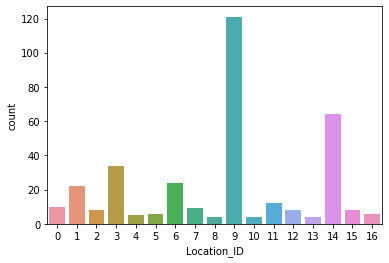

In [132]:
import seaborn as sns
sns.countplot(covid_df8["Location_ID"], label="Count")
plt.show()

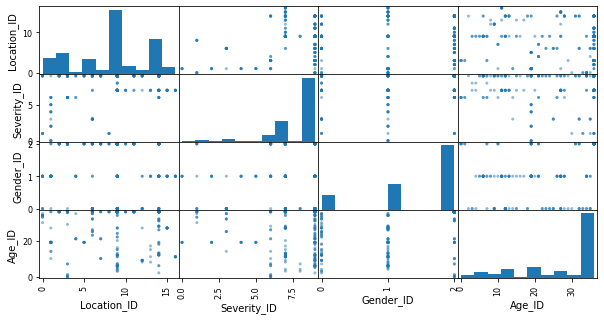

In [133]:
# the data is pretty balanced except mandarin 
from pandas.plotting import scatter_matrix 

scatter_matrix(covid_df8, figsize=(10,5))
plt.show()

In [135]:
from fastai import *
from fastai.vision import *
from fastai.vision.models import *
from torchvision.models import *

import torch
from torch.autograd import Variable

In [139]:
!pip install curses-menu

In [140]:
!gpustat

Traceback (most recent call last):
  File "c:\users\shuja\anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "c:\users\shuja\anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\Shuja\Anaconda3\Scripts\gpustat.exe\__main__.py", line 4, in <module>
  File "c:\users\shuja\anaconda3\lib\site-packages\gpustat\__init__.py", line 7, in <module>
    from .core import GPUStat, GPUStatCollection
  File "c:\users\shuja\anaconda3\lib\site-packages\gpustat\core.py", line 25, in <module>
    from blessings import Terminal
  File "c:\users\shuja\anaconda3\lib\site-packages\blessings\__init__.py", line 5, in <module>
    import curses
  File "c:\users\shuja\anaconda3\lib\curses\__init__.py", line 13, in <module>
    from _curses import *
ModuleNotFoundError: No module named '_curses'


In [138]:
!nvidia-smi

'nvidia-smi' is not recognized as an internal or external command,
operable program or batch file.


In [114]:
feature_names = ['Severity_ID','Gender_ID']
X = covid_df7[feature_names]
y = covid_df7['Location_ID']
X

KeyError: "['Age_ID'] not in index"

In [111]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [112]:
## Logistic Regression

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

print('Accuracy of logistic regression on training', logreg.score(X_train, y_train))
print('Accuracy of logistic regression on testing', logreg.score(X_test, y_test))

Accuracy of logistic regression on training 0.41379310344827586
Accuracy of logistic regression on testing 0.3409090909090909


C:\Users\Shuja\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [103]:
## Decision Tree

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

print('Accuracy of Decision tree on training', dt.score(X_train, y_train))
print('Accuracy of Decision tree on testing', dt.score(X_test, y_test))

Accuracy of Decision tree on training 0.5019157088122606
Accuracy of Decision tree on testing 0.5227272727272727


In [104]:
# Setting max decision tree depth to help avoid overfitting

dt2 = DecisionTreeClassifier(max_depth=3)
dt2.fit(X_train, y_train)
print('Accuracy of Decision tree on training', dt2.score(X_train, y_train))
print('Accuracy of Decision tree on testing', dt2.score(X_test, y_test))

Accuracy of Decision tree on training 0.4674329501915709
Accuracy of Decision tree on testing 0.4659090909090909


In [105]:
# K-nearest neighbor 

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Accuracy of Knn on training', knn.score(X_train, y_train))
print('Accuracy of Knn on testing', knn.score(X_test, y_test))

Accuracy of Knn on training 0.45977011494252873
Accuracy of Knn on testing 0.4659090909090909


In [106]:
# Linear Discriminant Analysis 

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train,y_train)
print('Accuracy of Lda on training', lda.score(X_train, y_train))
print('Accuracy of Lda on testing', lda.score(X_test, y_test))

Accuracy of Lda on training 0.4061302681992337
Accuracy of Lda on testing 0.3522727272727273


In [107]:
# Gaussian Naive Bayes 

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print('Accuracy of GNB on training', gnb.score(X_train, y_train))
print('Accuracy of GNB on testing', gnb.score(X_test, y_test))

Accuracy of GNB on training 0.17624521072796934
Accuracy of GNB on testing 0.18181818181818182


In [108]:
# Support Vector Machine

from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
print('Accuracy of SVM on training', svm.score(X_train, y_train))
print('Accuracy of SVM on testing', svm.score(X_test, y_test))

Accuracy of SVM on training 0.41379310344827586
Accuracy of SVM on testing 0.3409090909090909


In [57]:
dataset = covid_df3

In [58]:
dataset.shape

(349, 5)

In [59]:
dataset.describe()

,COVID Positive?,Severity,Location,Age,Gender
count,349,349,228,163,137
unique,1,10,16,36,4
top,2019-nCoV-Positive,Severe,"Wuhan, China",50.0 y/o,Male
freq,349,217,64,24,77


In [60]:
dataset.plot(x='Location', y='Severity', style='o')  
plt.title('Location vs Severity')  
plt.xlabel('Location')  
plt.ylabel('Severity')  
plt.show()

TypeError: no numeric data to plot

In [7]:
print(covid_df.shape)

(349, 6)


In [8]:
covid_df_encoded = pd.get_dummies(covid_df, columns=["Gender"])
covid_df_encoded


,Severity,File name,COVID Positive?,Location,Age,Gender_F,Gender_F,Gender_M,Gender_M
0,severe,2020.03.18.20038125-p16-56-6.png,1,“Diamond Princess” Cruise Ship,75.0,0,0,1,0
1,severe,2020.03.18.20038125-p16-56-5.png,1,“Diamond Princess” Cruise Ship,75.0,0,0,1,0
2,severe,2020.03.18.20038125-p16-56-4.png,1,“Diamond Princess” Cruise Ship,75.0,0,0,1,0
3,severe,2020.03.18.20038125-p16-56-3.png,1,“Diamond Princess” Cruise Ship,75.0,0,0,1,0
4,severe,2020.03.18.20038125-p16-56-2.png,1,“Diamond Princess” Cruise Ship,75.0,0,0,1,0
...,...,...,...,...,...,...,...,...,...
344,severe,2020.02.26.20026989-p34-114_1%1.png,1,NaN,NaN,0,0,0,0
345,severe,2020.02.26.20026989-p34-114_1%0.png,1,NaN,NaN,0,0,0,0
346,severe,2019-novel-Coronavirus-severe-adult-respirator...,1,NaN,65.0,0,1,0,0
347,moderate,2019-novel-Coronavirus-severe-adult-respirator...,1,NaN,65.0,0,1,0,0


In [9]:
covid_df_encoded2 = covid_df_encoded.drop(columns=covid_df_encoded.columns[[5, 8]])
covid_df_encoded2

,Severity,File name,COVID Positive?,Location,Age,Gender_F,Gender_M
0,severe,2020.03.18.20038125-p16-56-6.png,1,“Diamond Princess” Cruise Ship,75.0,0,1
1,severe,2020.03.18.20038125-p16-56-5.png,1,“Diamond Princess” Cruise Ship,75.0,0,1
2,severe,2020.03.18.20038125-p16-56-4.png,1,“Diamond Princess” Cruise Ship,75.0,0,1
3,severe,2020.03.18.20038125-p16-56-3.png,1,“Diamond Princess” Cruise Ship,75.0,0,1
4,severe,2020.03.18.20038125-p16-56-2.png,1,“Diamond Princess” Cruise Ship,75.0,0,1
...,...,...,...,...,...,...,...
344,severe,2020.02.26.20026989-p34-114_1%1.png,1,NaN,NaN,0,0
345,severe,2020.02.26.20026989-p34-114_1%0.png,1,NaN,NaN,0,0
346,severe,2019-novel-Coronavirus-severe-adult-respirator...,1,NaN,65.0,1,0
347,moderate,2019-novel-Coronavirus-severe-adult-respirator...,1,NaN,65.0,1,0


In [10]:
covid_df_encoded3 = covid_df_encoded2.fillna(covid_df_encoded2.mean()['Age'])
covid_df_encoded3

,Severity,File name,COVID Positive?,Location,Age,Gender_F,Gender_M
0,severe,2020.03.18.20038125-p16-56-6.png,1,“Diamond Princess” Cruise Ship,75.000000,0,1
1,severe,2020.03.18.20038125-p16-56-5.png,1,“Diamond Princess” Cruise Ship,75.000000,0,1
2,severe,2020.03.18.20038125-p16-56-4.png,1,“Diamond Princess” Cruise Ship,75.000000,0,1
3,severe,2020.03.18.20038125-p16-56-3.png,1,“Diamond Princess” Cruise Ship,75.000000,0,1
4,severe,2020.03.18.20038125-p16-56-2.png,1,“Diamond Princess” Cruise Ship,75.000000,0,1
...,...,...,...,...,...,...,...
344,severe,2020.02.26.20026989-p34-114_1%1.png,1,49.7853,49.785276,0,0
345,severe,2020.02.26.20026989-p34-114_1%0.png,1,49.7853,49.785276,0,0
346,severe,2019-novel-Coronavirus-severe-adult-respirator...,1,49.7853,65.000000,1,0
347,moderate,2019-novel-Coronavirus-severe-adult-respirator...,1,49.7853,65.000000,1,0


In [11]:
covid_df_encoded3 = pd.get_dummies(covid_df_encoded2, columns=["Location"])
covid_df_encoded3

# bin it for categories

,Severity,File name,COVID Positive?,Age,Gender_F,Gender_M,"Location_Beijing, China","Location_Changsha, China.",Location_China (Unspecified Region),"Location_Guangdon, China",...,"Location_Jingmen, Hubei, China","Location_Qingdao, China","Location_Shanghai, China","Location_Shenzhen, China","Location_Sichuan, China","Location_Wuhan, China","Location_Wuhan, China","Location_Xi'an, China","Location_Zhejiang, China",Location_“Diamond Princess” Cruise Ship
0,severe,2020.03.18.20038125-p16-56-6.png,1,75.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,severe,2020.03.18.20038125-p16-56-5.png,1,75.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,severe,2020.03.18.20038125-p16-56-4.png,1,75.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,severe,2020.03.18.20038125-p16-56-3.png,1,75.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,severe,2020.03.18.20038125-p16-56-2.png,1,75.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344,severe,2020.02.26.20026989-p34-114_1%1.png,1,NaN,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
345,severe,2020.02.26.20026989-p34-114_1%0.png,1,NaN,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
346,severe,2019-novel-Coronavirus-severe-adult-respirator...,1,65.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
347,moderate,2019-novel-Coronavirus-severe-adult-respirator...,1,65.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
# Assign X (data) and y (target)

data = covid_df_encoded3.values
X = data[:,2:]
y = data[:,0]

print("X values:",X)
print("y values:",y)

X values: [[1 75.0 0 ... 0 0 1]
 [1 75.0 0 ... 0 0 1]
 [1 75.0 0 ... 0 0 1]
 ...
 [1 65.0 1 ... 0 0 0]
 [1 65.0 1 ... 0 0 0]
 [1 65.0 1 ... 0 0 0]]
y values: ['severe' 'severe' 'severe' 'severe' 'severe' 'severe' 'asymptomatic '
 'asymptomatic ' 'asymptomatic ' 'asymptomatic ' 'mild' 'mild' 'critical'
 'severe' 'mild' 'light' 'Absorption stage' 'Absorption stage'
 'Consolidation stage' 'Consolidation stage' 'Consolidation stage'
 'Consolidation stage' 'Early stage' 'Early stage ' 'Dissipation stage'
 'Dissipation stage' 'Dissipation stage' 'Dissipation stage'
 'Absorption stage' 'Absorption stage' 'Early stage' 'Early stage'
 'severe' 'severe' 'severe' 'severe' 'severe' 'severe' 'severe' 'severe'
 'severe' 'severe' 'severe' 'severe' 'severe' 'severe' 'severe' 'severe'
 'severe' 'severe' 'severe' 'severe' 'mild' 'mild' 'mild' 'mild' 'mild'
 'mild' 'mild' 'mild' 'severe' 'severe' 'mild' 'mild' 'severe' 'severe'
 'severe' 'severe' 'severe' 'severe' 'severe' 'severe' 'mild' 'mild'
 'mild' 

In [13]:
# Step 1: Label-encode data set

label_encoder = LabelEncoder()
label_encoder.fit(y)
encoded_y = label_encoder.transform(y)
print(y)
print(encoded_y)

['severe' 'severe' 'severe' 'severe' 'severe' 'severe' 'asymptomatic '
 'asymptomatic ' 'asymptomatic ' 'asymptomatic ' 'mild' 'mild' 'critical'
 'severe' 'mild' 'light' 'Absorption stage' 'Absorption stage'
 'Consolidation stage' 'Consolidation stage' 'Consolidation stage'
 'Consolidation stage' 'Early stage' 'Early stage ' 'Dissipation stage'
 'Dissipation stage' 'Dissipation stage' 'Dissipation stage'
 'Absorption stage' 'Absorption stage' 'Early stage' 'Early stage'
 'severe' 'severe' 'severe' 'severe' 'severe' 'severe' 'severe' 'severe'
 'severe' 'severe' 'severe' 'severe' 'severe' 'severe' 'severe' 'severe'
 'severe' 'severe' 'severe' 'severe' 'mild' 'mild' 'mild' 'mild' 'mild'
 'mild' 'mild' 'mild' 'severe' 'severe' 'mild' 'mild' 'severe' 'severe'
 'severe' 'severe' 'severe' 'severe' 'severe' 'severe' 'mild' 'mild'
 'mild' 'mild' 'severe' 'severe' 'severe' 'severe ' 'severe ' 'severe '
 'severe ' 'severe ' 'severe ' 'severe' 'severe' 'severe' 'severe'
 'severe' 'severe' 'severe'

In [14]:
for label, severity in zip(encoded_y, y):
    print('Severity: ' + str(severity))
    print('Encoded Label: ' + str(label))
    print('-' * 12)

Severity: severe
Encoded Label: 12
------------
Severity: severe
Encoded Label: 12
------------
Severity: severe
Encoded Label: 12
------------
Severity: severe
Encoded Label: 12
------------
Severity: severe
Encoded Label: 12
------------
Severity: severe
Encoded Label: 12
------------
Severity: asymptomatic 
Encoded Label: 6
------------
Severity: asymptomatic 
Encoded Label: 6
------------
Severity: asymptomatic 
Encoded Label: 6
------------
Severity: asymptomatic 
Encoded Label: 6
------------
Severity: mild
Encoded Label: 9
------------
Severity: mild
Encoded Label: 9
------------
Severity: critical
Encoded Label: 7
------------
Severity: severe
Encoded Label: 12
------------
Severity: mild
Encoded Label: 9
------------
Severity: light
Encoded Label: 8
------------
Severity: Absorption stage
Encoded Label: 0
------------
Severity: Absorption stage
Encoded Label: 0
------------
Severity: Consolidation stage
Encoded Label: 1
------------
Severity: Consolidation stage
Encoded Label:

In [15]:
# Step 2: One-hot encoding

one_hot_y = to_categorical(encoded_y)
one_hot_y

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, one_hot_y, random_state=0)


In [17]:
from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler().fit(X_train) # Training data needs to be scaled

In [18]:
X_train_scaled = X_scaler.transform(X_train)  # Training scale
X_test_scaled = X_scaler.transform(X_test)    # Testing scale

In [19]:
from keras.utils import to_categorical

# One-hot encoding
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)
y_train_categorical

array([[[1., 0.],
        [1., 0.],
        [1., 0.],
        ...,
        [1., 0.],
        [0., 1.],
        [1., 0.]],

       [[1., 0.],
        [1., 0.],
        [1., 0.],
        ...,
        [1., 0.],
        [1., 0.],
        [1., 0.]],

       [[1., 0.],
        [1., 0.],
        [1., 0.],
        ...,
        [1., 0.],
        [1., 0.],
        [1., 0.]],

       ...,

       [[1., 0.],
        [1., 0.],
        [1., 0.],
        ...,
        [1., 0.],
        [0., 1.],
        [1., 0.]],

       [[1., 0.],
        [1., 0.],
        [1., 0.],
        ...,
        [1., 0.],
        [0., 1.],
        [1., 0.]],

       [[1., 0.],
        [1., 0.],
        [1., 0.],
        ...,
        [1., 0.],
        [0., 1.],
        [1., 0.]]], dtype=float32)

In [20]:
# scaler = MinMaxScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)
# #X_test_scaled = X_test_scaled.fillna(X_train_scaled.mean())

In [21]:
## Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train_categorical)

print('Accuracy of logistic regression on training', logreg.score(X_train_scaled, y_train_categorical))
print('Accuracy of logistic regression on testing', logreg.score(X_test_scaled, y_test))

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
## Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train_scaled, y_train)

print('Accuracy of Decision tree on training', dt.score(X_train_scaled, y_train))
print('Accuracy of Decision tree on testing', dt.score(X_test_scaled, y_test))